In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests


In [2]:
# Output File (CSV)
output_data_file = "../Clean_data/car_data.csv"

#Read WeatherPy CSV file
car_data= pd.read_csv(output_data_file)

car_data

,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control
0,2019,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,28.0,Car,3790.0,Yes,Yes,Yes
1,2019,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,28.0,Car,3829.0,Yes,Yes,Yes
2,2019,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,27.0,Car,3821.0,Yes,Yes,Yes
3,2019,2019 Acura RDX Specs: FWD,37400.0,28.0,Car,3783.0,No,Yes,Yes
4,2019,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,27.0,Car,4026.0,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...
30493,2018,2018 Volvo V60 Cross Country Specs: T5 AWD Pla...,45700.0,NaN,Car,3920.0,Yes,Yes,Yes
30494,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200.0,28.0,Car,3602.0,Yes,No,Yes
30495,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850.0,28.0,Car,3602.0,Yes,Yes,Yes
30496,2015,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000.0,28.0,Car,3602.0,Yes,No,Yes


In [3]:
#Creating conditions to determine mean of technology across years
################################################################
#Create new column to state if a car has parking aid (1 = Yes)
Conditions=[
		(car_data['Parking Aid'] == "Yes"),
		(car_data['Parking Aid'] == "No")
	]

Values=[1,0]


car_data["Includes Parking Aid"]=np.select(Conditions,Values)

################################################################
#Create new column to state if a car has Back-Up Camera (1 = Yes)
Conditions=[
		(car_data['Back-Up Camera'] == "Yes"),
		(car_data['Back-Up Camera'] == "No")
	]

Values=[1,0]


car_data["Includes Back-Up Camera"]=np.select(Conditions,Values)

################################################################
#Create new column to state if a car has Stability Control (1 = Yes)
Conditions=[
		(car_data["Stability Control"] == "Yes"),
		(car_data["Stability Control"] == "No")
	]

Values=[1,0]


car_data["Includes Stability Control"]=np.select(Conditions,Values)

car_data.head()


,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control,Includes Parking Aid,Includes Back-Up Camera,Includes Stability Control
0,2019,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,28.0,Car,3790.0,Yes,Yes,Yes,1,1,1
1,2019,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,28.0,Car,3829.0,Yes,Yes,Yes,1,1,1
2,2019,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,27.0,Car,3821.0,Yes,Yes,Yes,1,1,1
3,2019,2019 Acura RDX Specs: FWD,37400.0,28.0,Car,3783.0,No,Yes,Yes,0,1,1
4,2019,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,27.0,Car,4026.0,Yes,Yes,Yes,1,1,1


In [4]:
technology_columns =["Year", "Includes Parking Aid", "Includes Back-Up Camera", "Includes Stability Control"]

Technology_df = car_data[technology_columns]

Technology_df.head()

,Year,Includes Parking Aid,Includes Back-Up Camera,Includes Stability Control
0,2019,1,1,1
1,2019,1,1,1
2,2019,1,1,1
3,2019,0,1,1
4,2019,1,1,1


In [5]:
# Group by Year of Model
grouped_tech_year = Technology_df.groupby(["Year"]).first()


# Find Yearly Technology % by finding the mean in the original dataframe (0 and 1 values)
grouped_tech_year["% Parking Aid"] = (Technology_df.groupby("Year")["Includes Parking Aid"].mean() * 100)

grouped_tech_year["% Back-Up Camera"] = (Technology_df.groupby("Year")["Includes Back-Up Camera"].mean() * 100)

grouped_tech_year["% Stability Control"] = (Technology_df.groupby("Year")["Includes Stability Control"].mean() * 100)

grouped_tech_year.head()


,Includes Parking Aid,Includes Back-Up Camera,Includes Stability Control,% Parking Aid,% Back-Up Camera,% Stability Control
Year,,,,,,
1996,0,0,0,0.000000,0.0,1.278772
1997,0,0,0,0.639659,0.0,0.852878
1998,0,0,0,0.212314,0.0,1.910828
1999,0,0,0,0.184162,0.0,3.683241
2000,0,0,0,0.341297,0.0,7.337884


In [10]:
Final_tech_columns =["% Parking Aid", "% Back-Up Camera", "% Stability Control"]

tech_df= grouped_tech_year[Final_tech_columns]
tech_df

,% Parking Aid,% Back-Up Camera,% Stability Control
Year,,,
1996,0.000000,0.000000,1.278772
1997,0.639659,0.000000,0.852878
1998,0.212314,0.000000,1.910828
1999,0.184162,0.000000,3.683241
2000,0.341297,0.000000,7.337884
2001,1.092896,0.000000,9.289617
2002,1.195219,0.000000,13.811421
2003,3.419811,0.235849,14.504717
2004,3.578337,0.290135,21.276596


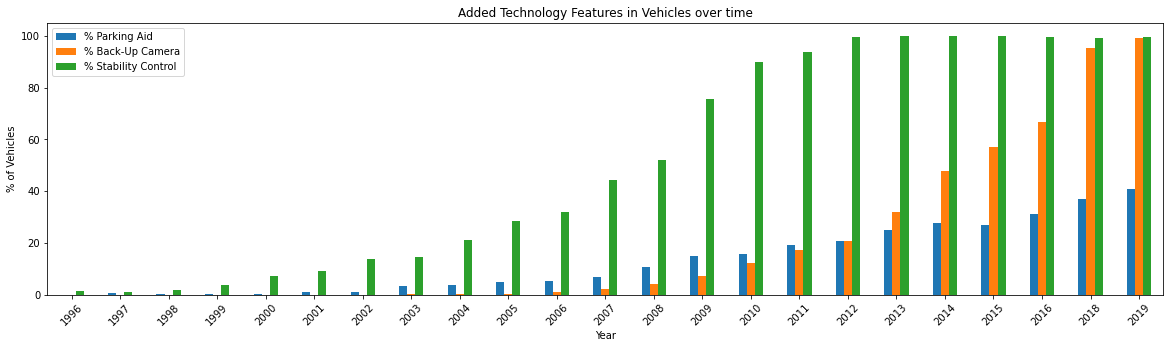

<Figure size 432x288 with 0 Axes>

In [28]:
#Create a multiplot bar chart showing 3 technology features over time 

technology_multiplot= tech_df.plot(kind="bar", figsize=(20,5))

technology_multiplot.set_xticklabels(tech_df.index, rotation=45)
plt.title("Added Technology Features in Vehicles over time")
plt.ylabel("Percent of Vehicles")
plt.show()
plt.tight_layout()

#Save as an output PNG file
plt.savefig('Tech_barchart.png')

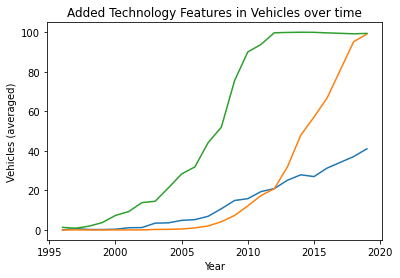

In [27]:
#Create a multiplot line chart showing 3 technology features over time 
plt.plot(tech_df)
plt.title("Added Technology Features in Vehicles over time")
plt.ylabel("Percent of Vehicles")
plt.xlabel("Year")

#add a legend

plt.show()